In [1]:
import pandas as pd
churnData = pd.read_csv("C:\\Users\\dell 7548\\Desktop\\REVA\\Data Management\\session4\\churn.csv")
df = pd.DataFrame(churnData)
df.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN
0,349224,FL,ACTIVATION,Active,1365.94,1183.71,10,3,UNLIMITED
1,253440,FL,ACTIVATION,Active,7617.94,7617.94,13,3,OTHER
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE
3,226167,GA,ACTIVATION,Active,658.80,658.80,14,3,100 MINUTE
4,286110,AL,ACTIVATION,Active,587.45,526.46,12,3,UNLIMITED


In [2]:
df.groupby(['STATE'])['CHURN_STATUS'].count()

STATE
AK        3
AL    22815
AR      319
AZ       25
CA       83
CO       34
CT       12
DC        5
DE        2
FL    12156
GA    30080
Name: CHURN_STATUS, dtype: int64

In [3]:
pd.pivot_table(df, values="RATE_PLAN", index=["STATE"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
STATE,,
AK,0,3
AL,12592,10223
AR,109,210
AZ,0,25
CA,13,70
CO,2,32
CT,2,10
DC,1,4
DE,0,2


In [4]:
df.describe()

,CUSTOMERID,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,207132.709235,907.141302,871.373408,12.253395,3.426359
std,107951.022669,932.175201,897.686330,6.542304,1.937033
min,10002.000000,0.000000,0.000000,1.000000,0.000000
25%,118132.500000,360.995000,348.495000,8.000000,2.000000
50%,205003.500000,636.150000,610.225000,11.000000,5.000000
75%,296900.250000,1130.727500,1080.477500,17.000000,5.000000
max,399441.000000,18063.530000,17380.210000,33.000000,10.000000


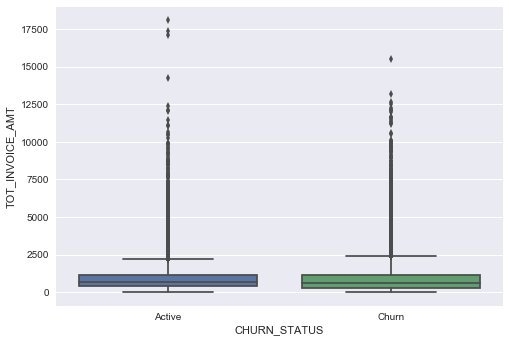

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="CHURN_STATUS", y="TOT_INVOICE_AMT", data=df)
plt.show()

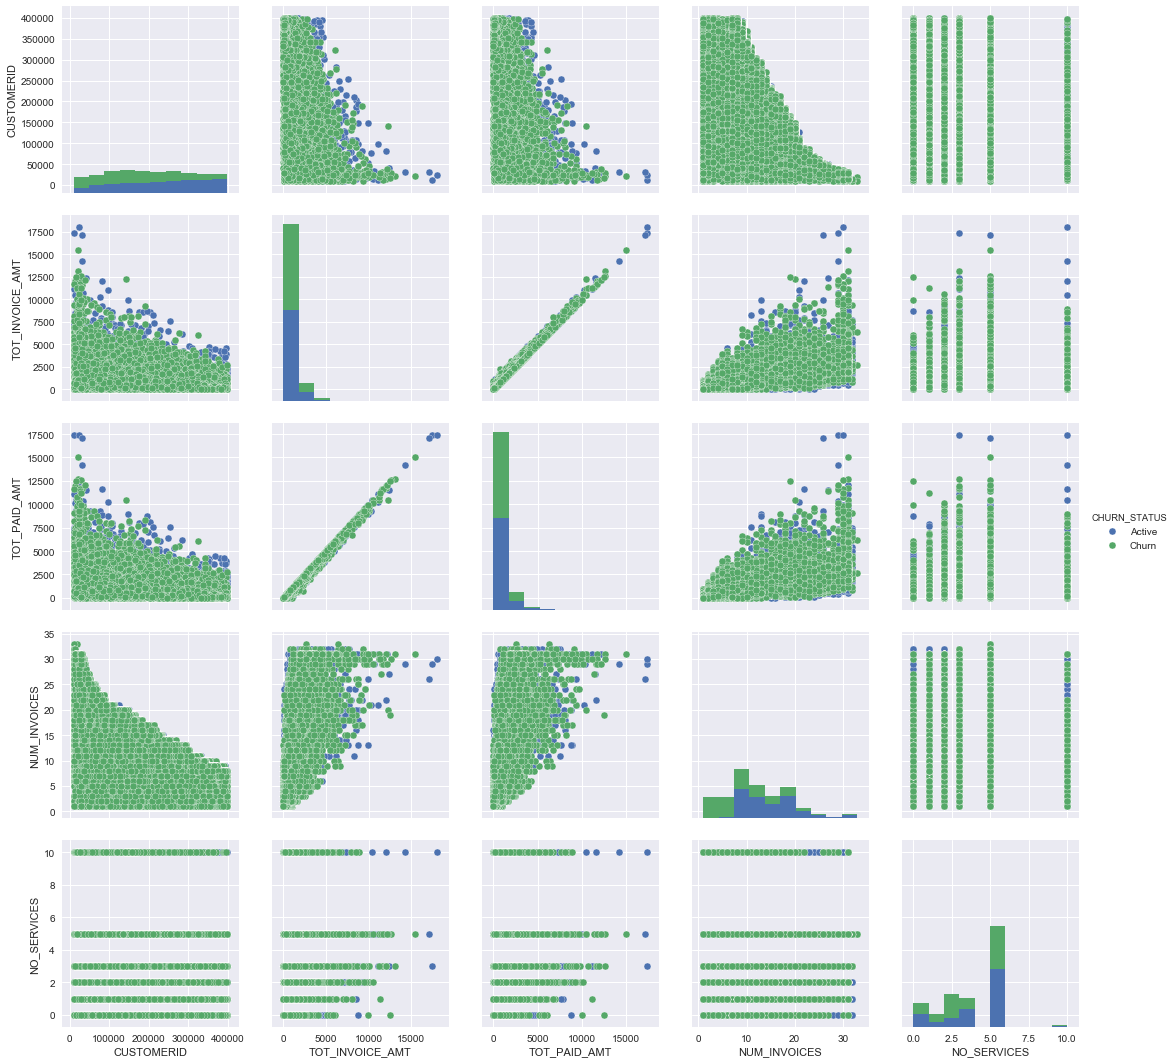

In [6]:
sns.pairplot(df, hue="CHURN_STATUS", size=3)
plt.show()

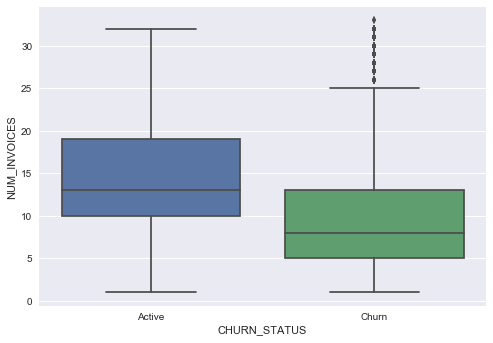

In [7]:
sns.boxplot(x="CHURN_STATUS", y="NUM_INVOICES", data=df)
plt.show()

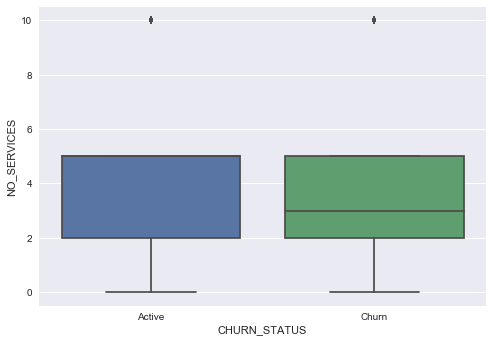

In [8]:
sns.boxplot(x="CHURN_STATUS", y="NO_SERVICES", data=df)
plt.show()

In [10]:
import numpy as np
df['numInvBin'] = np.where(df['NUM_INVOICES'] <= 10,'<=10','>10')

In [11]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["numInvBin"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin,,
<=10,10093,20214
>10,23583,11644


In [12]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["NUM_INVOICES"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
NUM_INVOICES,,
1,27,2034
2,38,1647
3,21,1466
4,29,1749
5,40,2239
6,75,2226
7,148,2274
8,3215,2621
9,4077,2354


In [13]:
df['numInvBin2'] = np.where(df['NUM_INVOICES'] <= 7,'<=7','>7')

In [14]:
pd.pivot_table(df, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,378,13635
>7,33298,18223


In [15]:
train, test = np.split(df.sample(frac=1), [int(.7*len(df))])

In [16]:
pd.pivot_table(train, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,264,9543
>7,23421,12645


In [17]:
pd.pivot_table(test, values="TOT_PAID_AMT", index=["numInvBin2"], columns="CHURN_STATUS", aggfunc = "count",fill_value=0)

CHURN_STATUS,Active,Churn
numInvBin2,,
<=7,114,4092
>7,9877,5578
